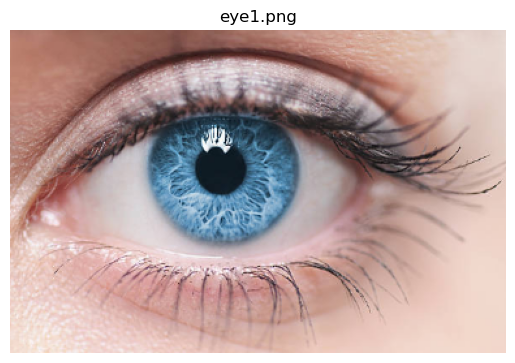

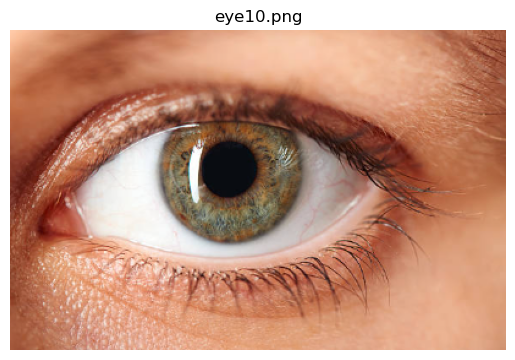

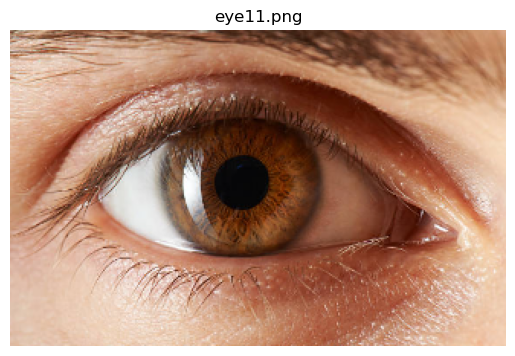

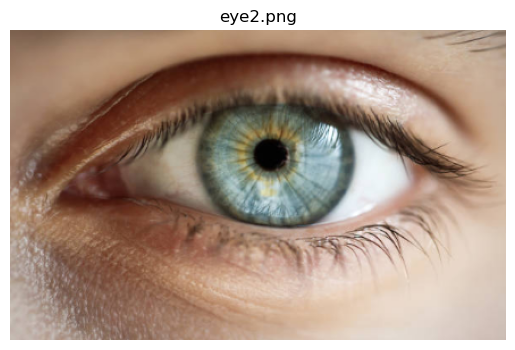

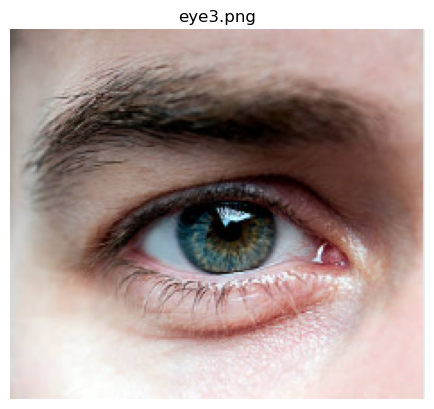

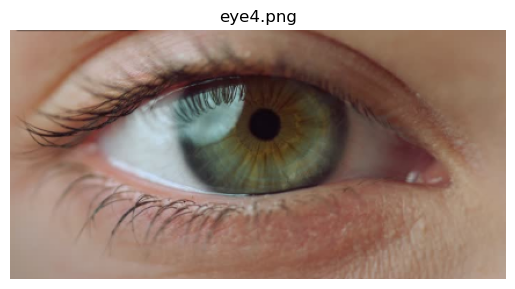

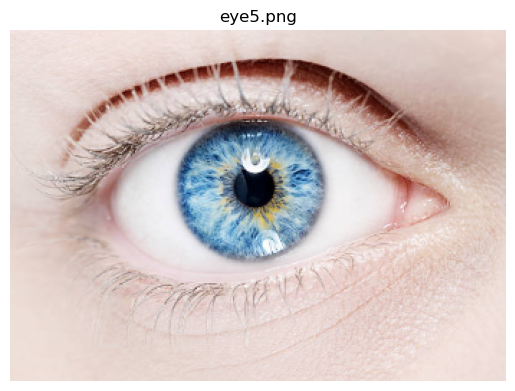

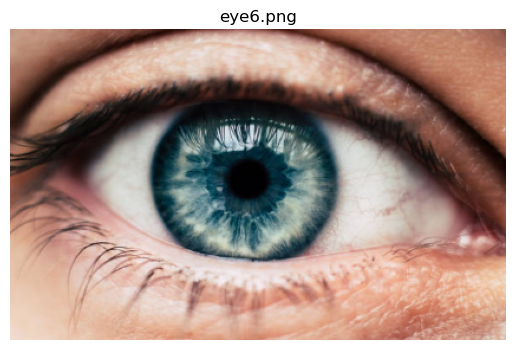

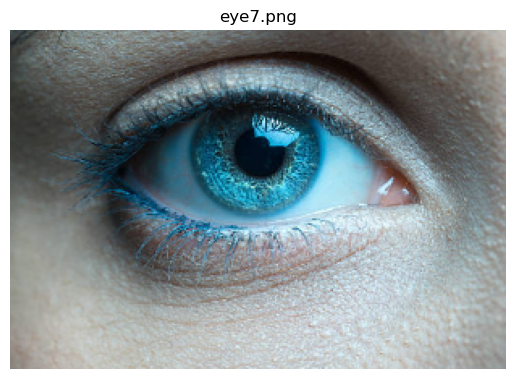

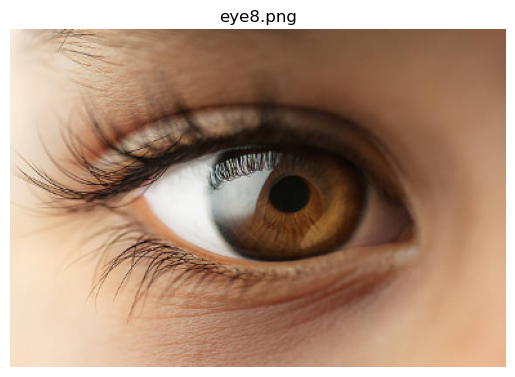

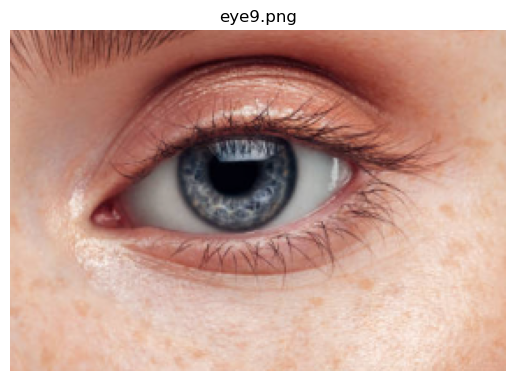

In [8]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import os
import re

# Define the GitHub repository URL
github_repo_url = 'https://raw.githubusercontent.com/mFadzilb/Computer-Vision/main/'

# Function to list all .png files in the repository
def list_png_files(repo_url):
    repo_api_url = repo_url.replace('raw.githubusercontent.com', 'api.github.com/repos').replace('/main/', '/contents/')
    response = requests.get(repo_api_url)
    if response.status_code == 200:
        files = response.json()
        png_files = [file['name'] for file in files if file['name'].endswith('.png')]
        return png_files
    else:
        print("Failed to retrieve file list from GitHub")
        return []

# Function to download and display images
def fetch_and_display_images(image_filenames, base_url):
    for filename in image_filenames:
        image_url = os.path.join(base_url, filename)
        response = requests.get(image_url)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            plt.figure()
            plt.imshow(img)
            plt.axis('off')
            plt.title(filename)
            plt.show()
        else:
            print(f"Failed to retrieve image {filename}")

# List all .png files in the GitHub repository
image_filenames = list_png_files(github_repo_url)

# Fetch and display images
fetch_and_display_images(image_filenames, github_repo_url)
